# collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Y. Build a model to find out which drug might be appropriate for a future patient with the same illness.

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
df=pd.read_csv('drug200.csv')

In [129]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [130]:
df.shape

(200, 6)

In [131]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# EDA

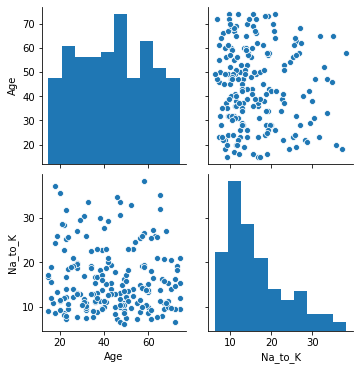

In [132]:
sns.pairplot(df)

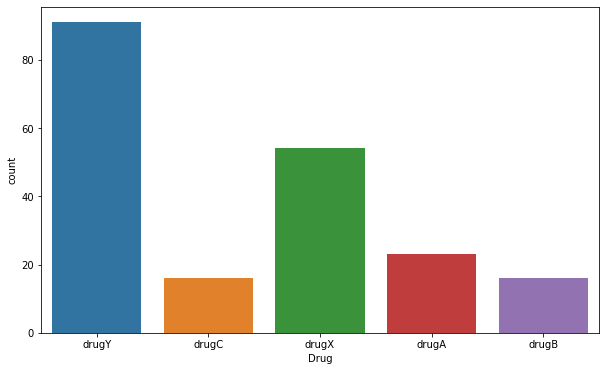

In [133]:
plt.figure(figsize=(10,6))
sns.countplot(x='Drug',data=df)

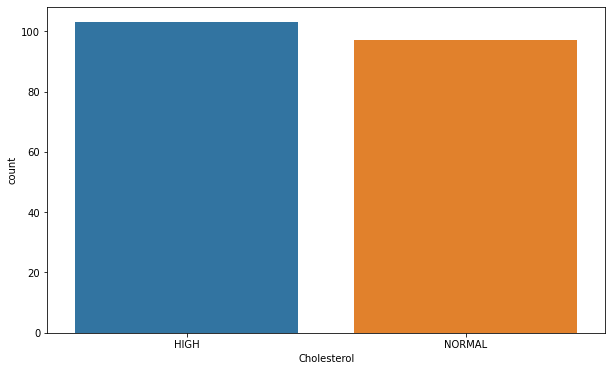

In [134]:
plt.figure(figsize=(10,6))
sns.countplot(x='Cholesterol',data=df)

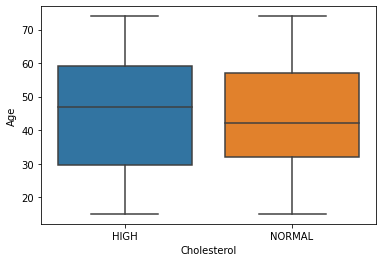

In [135]:
sns.boxplot(x='Cholesterol',y='Age',data=df)

In [137]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [138]:
#AS there are many categorical features,we have to convert categorical features into the Dummy variables
#We need to convert it to dummy variables because our ML model does not understand Categories
#Our ML model will not take it as input

In [139]:
df['BP'].nunique()

3

In [140]:
df['Cholesterol'].nunique()

2

In [141]:
df['Drug'].nunique()

5

In [142]:
sex_feature=['Sex']
final_data=pd.get_dummies(df,columns=sex_feature,drop_first=True)

In [143]:
final_data.head()

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_M
0,23,HIGH,HIGH,25.355,drugY,0
1,47,LOW,HIGH,13.093,drugC,1
2,47,LOW,HIGH,10.114,drugC,1
3,28,NORMAL,HIGH,7.798,drugX,0
4,61,LOW,HIGH,18.043,drugY,0


In [144]:
bp_feature=['BP']
final_data=pd.get_dummies(final_data,columns=bp_feature,drop_first=True)

In [145]:
final_data.head()

,Age,Cholesterol,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL
0,23,HIGH,25.355,drugY,0,0,0
1,47,HIGH,13.093,drugC,1,1,0
2,47,HIGH,10.114,drugC,1,1,0
3,28,HIGH,7.798,drugX,0,0,1
4,61,HIGH,18.043,drugY,0,1,0


In [146]:
chol_feature=['Cholesterol']
final_data=pd.get_dummies(final_data,columns=chol_feature,drop_first=True)

In [147]:
final_data.head()

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,drugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,drugY,0,1,0,0


In [149]:
final_data['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [150]:
#Written a function to convert the Drug Category into Dummy Values 
# drugA=1,drugB=2,drugC=3,drugX=4,drugY=5

In [151]:
def drug(val):
    if val=='drugA':
        return 1
    if val=='drugB':
        return 2
    if val=='drugC':
        return 3
    if val=='drugX':
        return 4
    if val=='drugY':
        return 5

In [152]:
final_data['Drug']=final_data['Drug'].apply(drug)

In [153]:
final_data.head()

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,5,0,0,0,0
1,47,13.093,3,1,1,0,0
2,47,10.114,3,1,1,0,0
3,28,7.798,4,0,0,1,0
4,61,18.043,5,0,1,0,0


In [156]:
final_data['Drug'].value_counts()

5    91
4    54
1    23
3    16
2    16
Name: Drug, dtype: int64

# Train and Test

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X=final_data.drop(columns='Drug',axis=1)
y=final_data['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [159]:
X_train.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
114,20,9.281,0,0,1,1
187,47,10.403,1,0,0,0
76,36,11.198,0,0,0,0
122,34,22.456,1,0,1,0
142,60,8.621,1,0,0,1


In [160]:
y_train.head()

114    4
187    1
76     1
122    5
142    2
Name: Drug, dtype: int64

In [161]:
X_test.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
112,35,9.170,1,1,0,1
165,38,18.295,1,1,0,0
12,43,15.376,1,1,0,0
73,41,22.905,0,0,1,1
144,39,9.664,1,0,0,0


In [162]:
y_train.head()

114    4
187    1
76     1
122    5
142    2
Name: Drug, dtype: int64

In [163]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
dtree=DecisionTreeClassifier()

In [164]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Prediction

In [165]:
prediction=dtree.predict(X_test)

In [167]:
prediction

array([4, 5, 5, 5, 1, 5, 4, 5, 4, 5, 4, 4, 5, 4, 5, 5, 2, 5, 1, 4, 5, 3,
       5, 1, 1, 1, 5, 4, 5, 4, 5, 5, 5, 4, 4, 3, 4, 2, 5, 2, 4, 5, 4, 5,
       5, 5, 5, 5, 5, 5, 3, 4, 1, 5, 5, 5, 5, 2, 1, 4], dtype=int64)

# Evolution of model using Confusion Matrices,etc

In [168]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [169]:
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

[[ 6  0  0  0  0]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 16  1]
 [ 0  0  0  0 29]]


              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         3
           4       1.00      0.94      0.97        17
           5       0.97      1.00      0.98        29

    accuracy                           0.97        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.97      0.97      0.97        60



In [170]:
print(accuracy_score(y_test,prediction))

0.9666666666666667


In [171]:
#The accuracy score is 96% 
#Looking at confusion matrix and Classification report we can see that our model have done preety good

# Using Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
rfor=RandomForestClassifier(n_estimators=30)

In [174]:
rfor.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [175]:
pred=rfor.predict(X_test)

In [176]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

[[ 6  0  0  0  0]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 17  0]
 [ 0  0  0  0 29]]


              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        29

    accuracy                           0.98        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.99      0.98      0.98        60



0.9833333333333333


In [177]:
#our accuracy Score is 98%
#our model have done preety Good